In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

ENUMDATA = ["Access_to_Resources","Parental_Involvement","Motivation_Level","Teacher_Quality","Family_Income","Extracurricular_Activities","Internet_Access","Learning_Disabilities","Peer_Influence","Parental_Education_Level","Gender","Distance_from_Home","School_Type"]
data = pd.read_csv("StudentPerformanceFactors.csv")
LOWMEDHIGH = {"Low":1,"Medium":2,"High":3}
for i in ["Access_to_Resources","Parental_Involvement","Motivation_Level","Teacher_Quality","Family_Income"]:
    data[i] = data[i].map(LOWMEDHIGH)
NOYES = {"No":0,"Yes":1}
for i in ["Extracurricular_Activities","Internet_Access","Learning_Disabilities"]:
    data[i] = data[i].map(NOYES)
PEERMAP = {"Positive":1,"Negative":-1,"Neutral":0}
data["Peer_Influence"] = data["Peer_Influence"].map(PEERMAP)
EDULVLMAP = {"College":2,"Postgraduate":3,"High School":1, float('nan'):0}
data["Parental_Education_Level"] = data["Parental_Education_Level"].map(EDULVLMAP)
GENDERMAP = {"Male":0,"Female":1}
data["Gender"] = data["Gender"].map(GENDERMAP)
NEARMODFAR = {"Near":3,"Moderate":2,"Far":1}
data["Distance_from_Home"] = data["Distance_from_Home"].map(NEARMODFAR)
SCHOOLTYPEMAP = {"Public":0,"Private":1}
data["School_Type"] = data["School_Type"].map(SCHOOLTYPEMAP)

In [21]:
# First 5 rows of data
data.head(20)
men_data = data[data["Gender"] == "Male"].copy()
men_data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,0,7,73,1,1,0,1,2.0,Public,1,3,0,1,Near,Male,67
2,24,98,2,2,1,7,91,2,1,2,2,2.0,Public,0,4,0,3,Near,Male,74
3,29,89,1,2,1,8,98,2,1,1,2,2.0,Public,-1,4,0,1,Moderate,Male,71
5,19,88,2,2,1,8,89,2,1,3,2,2.0,Public,1,3,0,3,Near,Male,71
6,29,84,2,1,1,7,68,1,1,1,1,2.0,Private,0,2,0,1,Moderate,Male,67


In [5]:
# Basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   int64  
 1   Attendance                  6607 non-null   int64  
 2   Parental_Involvement        6607 non-null   int64  
 3   Access_to_Resources         6607 non-null   int64  
 4   Extracurricular_Activities  6607 non-null   int64  
 5   Sleep_Hours                 6607 non-null   int64  
 6   Previous_Scores             6607 non-null   int64  
 7   Motivation_Level            6607 non-null   int64  
 8   Internet_Access             6607 non-null   int64  
 9   Tutoring_Sessions           6607 non-null   int64  
 10  Family_Income               6607 non-null   int64  
 11  Teacher_Quality             6529 non-null   float64
 12  School_Type                 6607 non-null   object 
 13  Peer_Influence              6607 

In [6]:
# Statistical Summary
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [7]:
# Missing values
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [8]:
# Correlation Matrix ( Numeric Only )
data.corr(numeric_only=True)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.009908,0.010977,0.024846,-0.014282,0.004624,0.445455
Attendance,-0.009908,1.000000,-0.015918,-0.020186,0.014324,-0.022435,0.581072
Sleep_Hours,0.010977,-0.015918,1.000000,-0.021750,-0.012216,-0.000378,-0.017022
Previous_Scores,0.024846,-0.020186,-0.021750,1.000000,-0.013122,-0.011274,0.175079
Tutoring_Sessions,-0.014282,0.014324,-0.012216,-0.013122,1.000000,0.017733,0.156525
Physical_Activity,0.004624,-0.022435,-0.000378,-0.011274,0.017733,1.000000,0.027824
Exam_Score,0.445455,0.581072,-0.017022,0.175079,0.156525,0.027824,1.000000


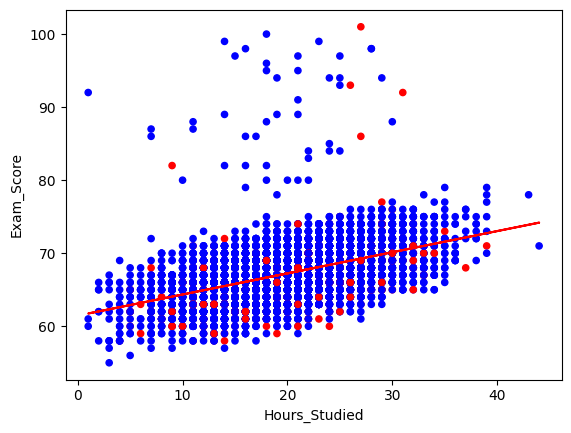

In [52]:
# Visualization Scatter Plot with Regresion
x_key = "Hours_Studied"
y_key = "Exam_Score"
c_key = "Internet_Access"
# x_key -> data for x axis, y_key -> data for y axis, c_key data for color
#Set color stuff i change change lng and map values kay ugly
color_map = {3:'green',2:'yellow',1:'blue',0:'red',float('nan'):'black'}
colors = None   # No color mapping in case invalid ang c_key
if c_key in data.keys():
    if c_key in ENUMDATA:
        colors = data[c_key].map(color_map) # if data is enum get colors from map
    else:
        colors = c_key                      # if data already numerical get colors from gradient
#Draw Scatter Plot
data.plot(kind="scatter",x=x_key,y=y_key,c=colors)
#Get Slope and Intercept
slope, intercept = np.polyfit(data[x_key], data[y_key], 1) 
#Draw Regression
plt.plot(data[x_key], slope * data[x_key] + intercept, color = 'red')
